<a href="https://colab.research.google.com/github/ElaYJ/Study_Deep_Learning/blob/main/DL_Project/YOLOv8_sample_data_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

os.mkdir("/content/drive/MyDrive/DLP/[DS]_Deep_Learning_Project/sample_data")

<br></br>

## train dataset

In [ ]:
src_dir = "/content/drive/MyDrive/DLP/[DS]_Deep_Learning_Project/strawberry/train/"

tdata_list = os.listdir(src_dir + "labels")
tdata_list = [x.split('.')[0] for x in tdata_list]
tdata_list[:5], len(tdata_list)

(['C22_B02_004_415447',
  'C22_B02_004_415440',
  'C22_B02_007_415457',
  'C22_B02_006_415456',
  'C22_B02_006_415463'],
 24346)

In [ ]:
import random

sample_data = random.sample(tdata_list, k=1000)
sample_data[:10]

['C24_B02_005_426408',
 'C24_B02_002_573281',
 'C22_B02_003_418527',
 'C25_B02_004_446881',
 'C23_B02_006_431349',
 'C22_B02_007_415667',
 'C24_B02_003_594607',
 'C22_B02_007_435856',
 'C22_B02_005_694938',
 'C23_B02_005_790958']

In [ ]:
dst_dir = "/content/drive/MyDrive/DLP/[DS]_Deep_Learning_Project/sample_data/"

os.mkdir(dst_dir + 'train')

In [ ]:
dst_dir = "/content/drive/MyDrive/DLP/[DS]_Deep_Learning_Project/sample_data/train/"

os.mkdir(dst_dir + 'images')
os.mkdir(dst_dir + 'labels')

'/content/drive/MyDrive/딥러닝프로젝트/[DS] Deep Learning Project/sample_data/train/'

In [ ]:
os.path.join(src_dir+"images/", sample_data[0]+'.jpg')

'/content/drive/MyDrive/딥러닝프로젝트/[DS] Deep Learning Project/strawberry/train/images/C24_B02_005_426408.jpg'

In [ ]:
import shutil

for fname in sample_data:
    # images
    src = os.path.join(src_dir+"images/", fname+'.jpg')
    dst = os.path.join(dst_dir+"images/", fname+'.jpg')
    shutil.copyfile(src, dst)

    # labels
    src = os.path.join(src_dir+"labels/", fname+'.txt')
    dst = os.path.join(dst_dir+"labels/", fname+'.txt')
    shutil.copyfile(src, dst)

In [ ]:
image_list = os.listdir("/content/drive/MyDrive/DLP/[DS]_Deep_Learning_Project/sample_data/train/images")
label_list = os.listdir("/content/drive/MyDrive/DLP/[DS]_Deep_Learning_Project/sample_data/train/labels")
len(image_list), len(label_list)

(1000, 1000)

<br></br>

## valid dataset

In [ ]:
src_dir = "/content/drive/MyDrive/DLP/[DS]_Deep_Learning_Project/strawberry/valid/"

vdata_list = os.listdir(src_dir + "images")
vdata_list = [x.split('.')[0] for x in vdata_list]
vdata_list[:5], len(vdata_list)

(['C23_B02_001_533310',
  'C25_B02_001_537756',
  'C23_B02_005_533318',
  'C25_B02_003_537817',
  'C25_B02_002_537788'],
 3025)

In [ ]:
sample_data = random.sample(vdata_list, k=100)
sample_data[:10]

['C24_B02_006_676611',
 'C24_B02_006_676557',
 'C22_B02_006_484112',
 'C23_B02_001_430226',
 'C24_B02_006_425193',
 'C24_B02_004_425188',
 'C23_B02_001_420682',
 'C24_B02_002_537928',
 'C25_B02_004_447427',
 'C22_B02_003_671145']

In [ ]:
dst_dir = "/content/drive/MyDrive/DLP/[DS]_Deep_Learning_Project/sample_data/"

os.mkdir(dst_dir + 'valid')

In [ ]:
dst_dir = "/content/drive/MyDrive/DLP/[DS]_Deep_Learning_Project/sample_data/valid/"

os.mkdir(dst_dir + 'images')
os.mkdir(dst_dir + 'labels')

In [ ]:
from tqdm import tqdm_notebook

for fname in tqdm_notebook(sample_data):
    # images
    src = os.path.join(src_dir+"images/", fname+'.jpg')
    dst = os.path.join(dst_dir+"images/", fname+'.jpg')
    shutil.copyfile(src, dst)

    # labels
    src = os.path.join(src_dir+"labels/", fname+'.txt')
    dst = os.path.join(dst_dir+"labels/", fname+'.txt')
    shutil.copyfile(src, dst)

<ipython-input-23-3a91dadb2626>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for fname in tqdm_notebook(sample_data):


  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
image_list = os.listdir("/content/drive/MyDrive/DLP/[DS]_Deep_Learning_Project/sample_data/valid/images")
label_list = os.listdir("/content/drive/MyDrive/DLP/[DS]_Deep_Learning_Project/sample_data/valid/labels")
len(image_list), len(label_list)

(100, 100)

<br></br>

## YOLO model

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.0/755.0 kB 10.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 523, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'export', 'predict', 'val', 'train', 'benchmark', 'track'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'obb', 'classify', 'pose', 'segment', 'detect'}
                MODE (required) is one of {'export', 'predict', 'val', 'train', 'benchmark', 'track'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

In [ ]:
dataset_location = "/content/drive/MyDrive/DLP/sample_data"

In [ ]:
os.listdir(dataset_location)

['train', 'valid', 'data.yaml']

In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset_location}/data.yaml epochs=30 imgsz=640

Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/DLP/sample_data/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True,

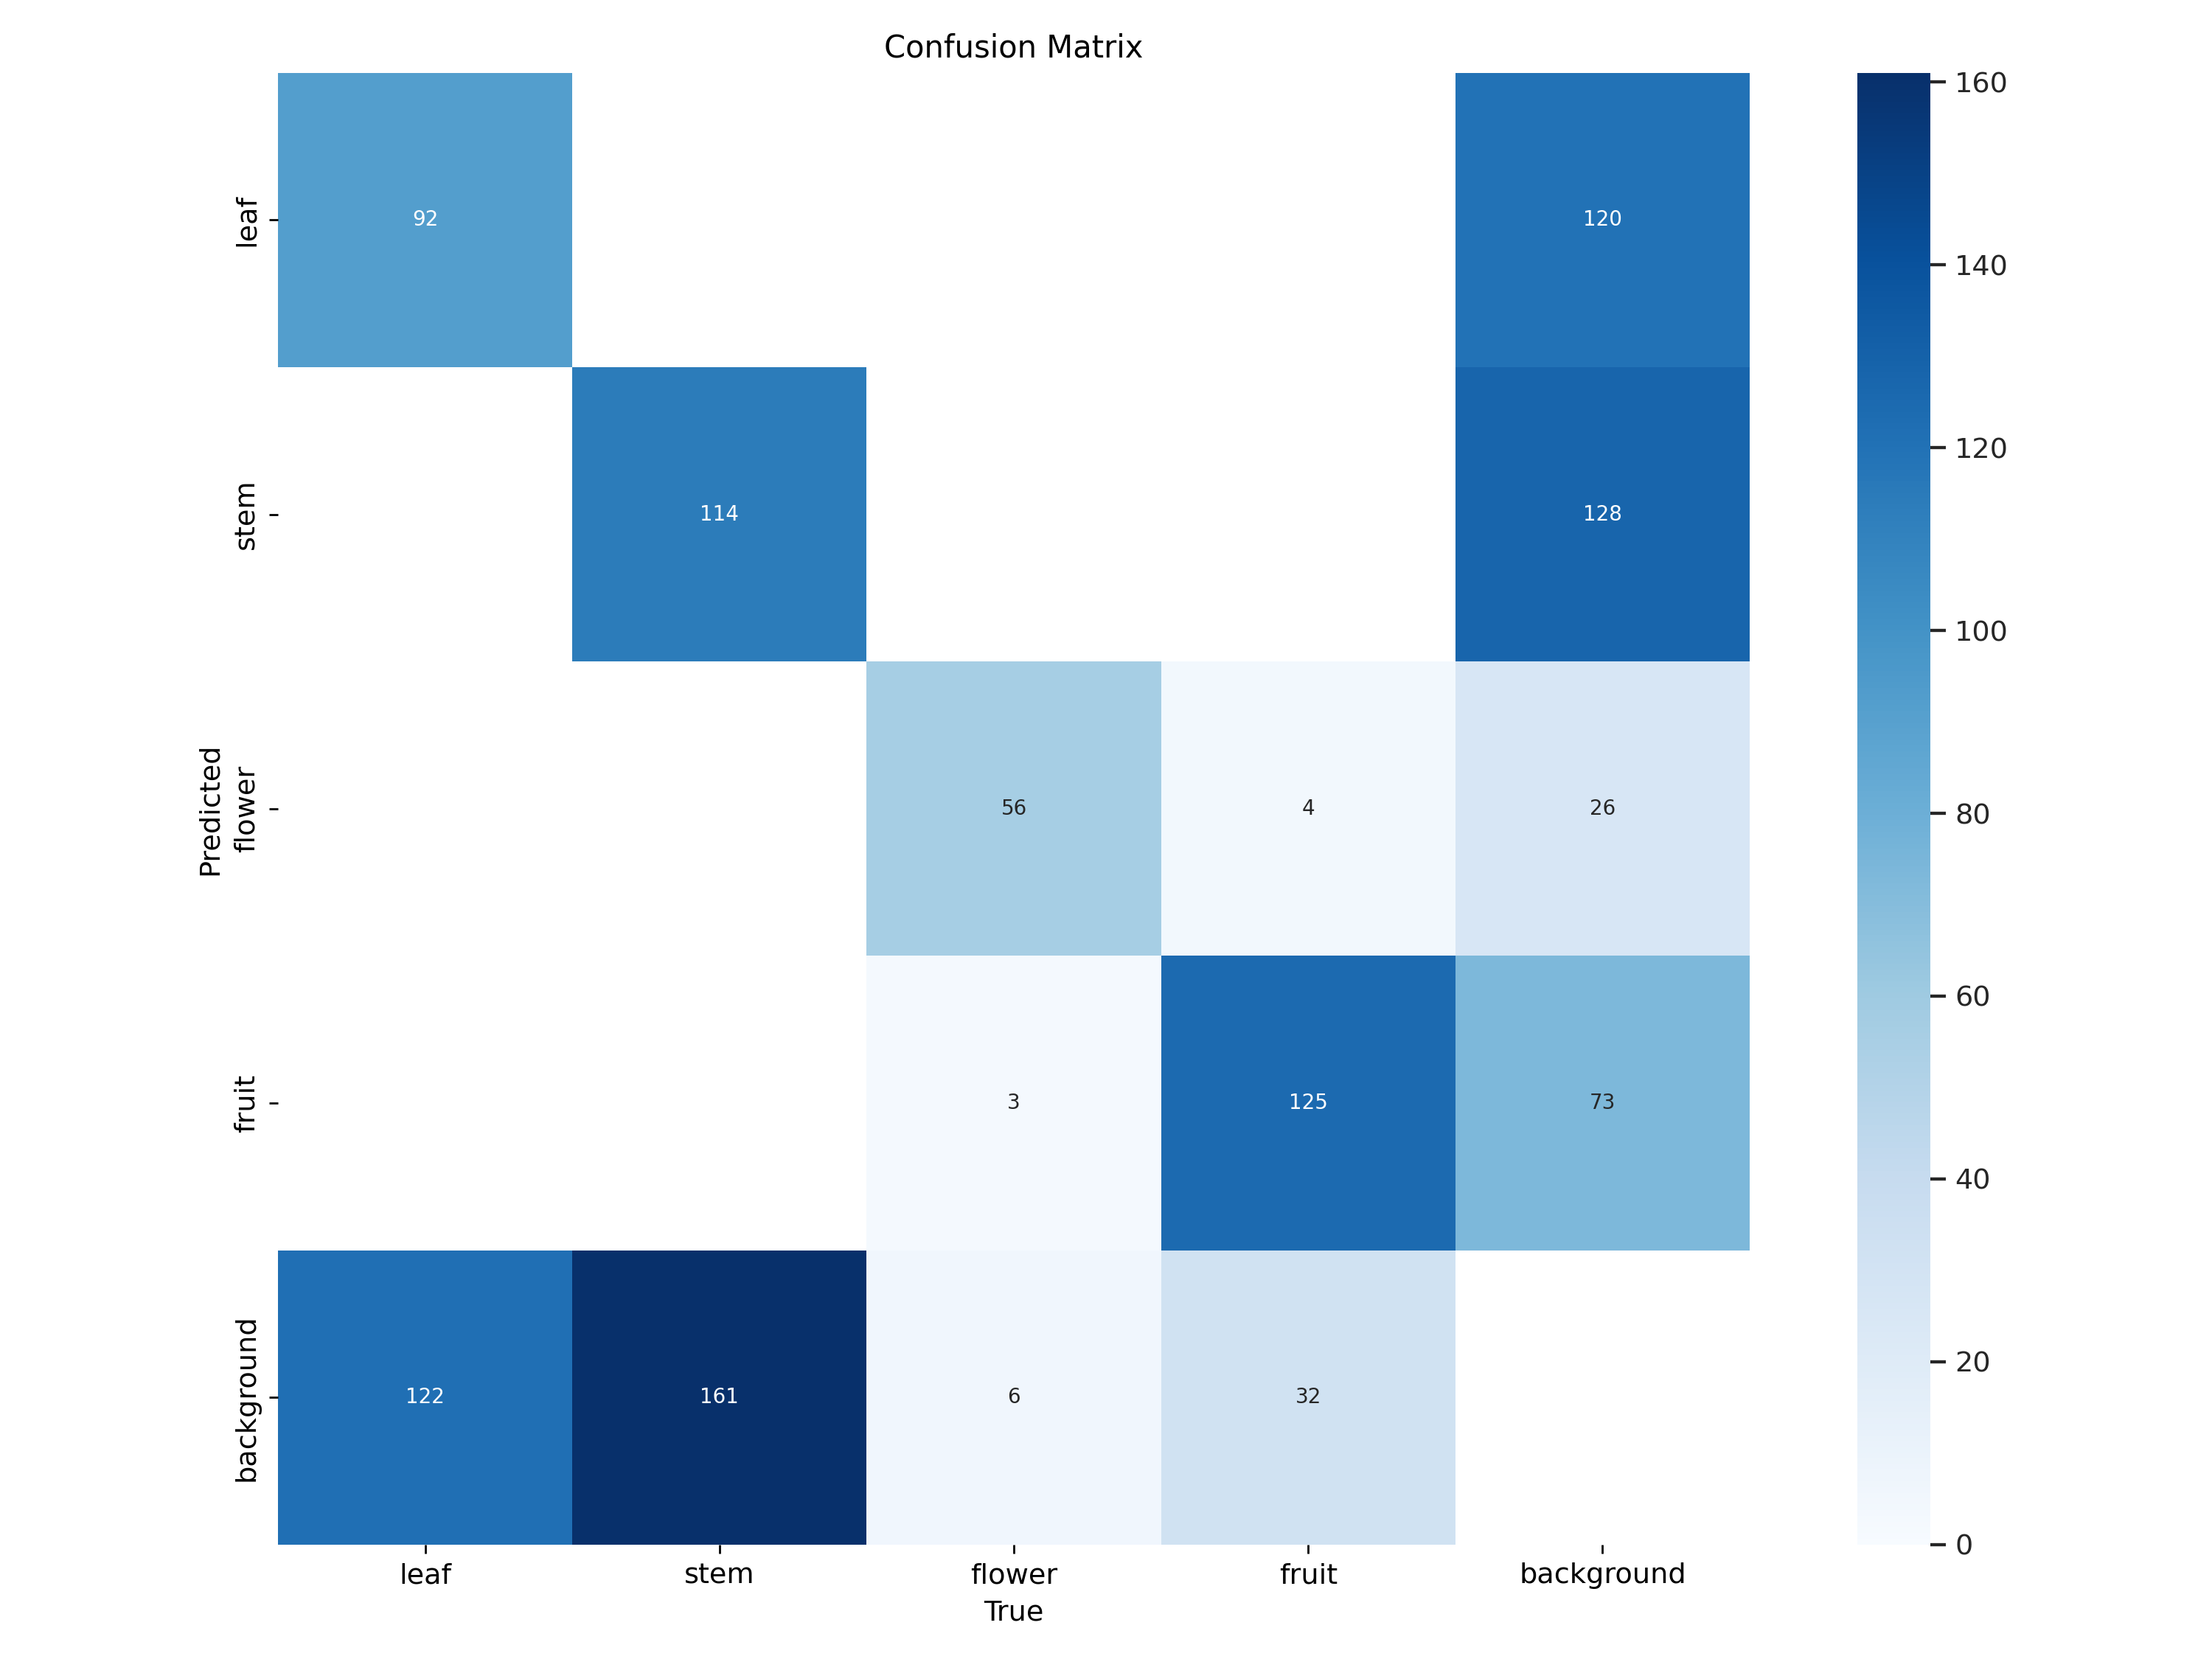

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=700)

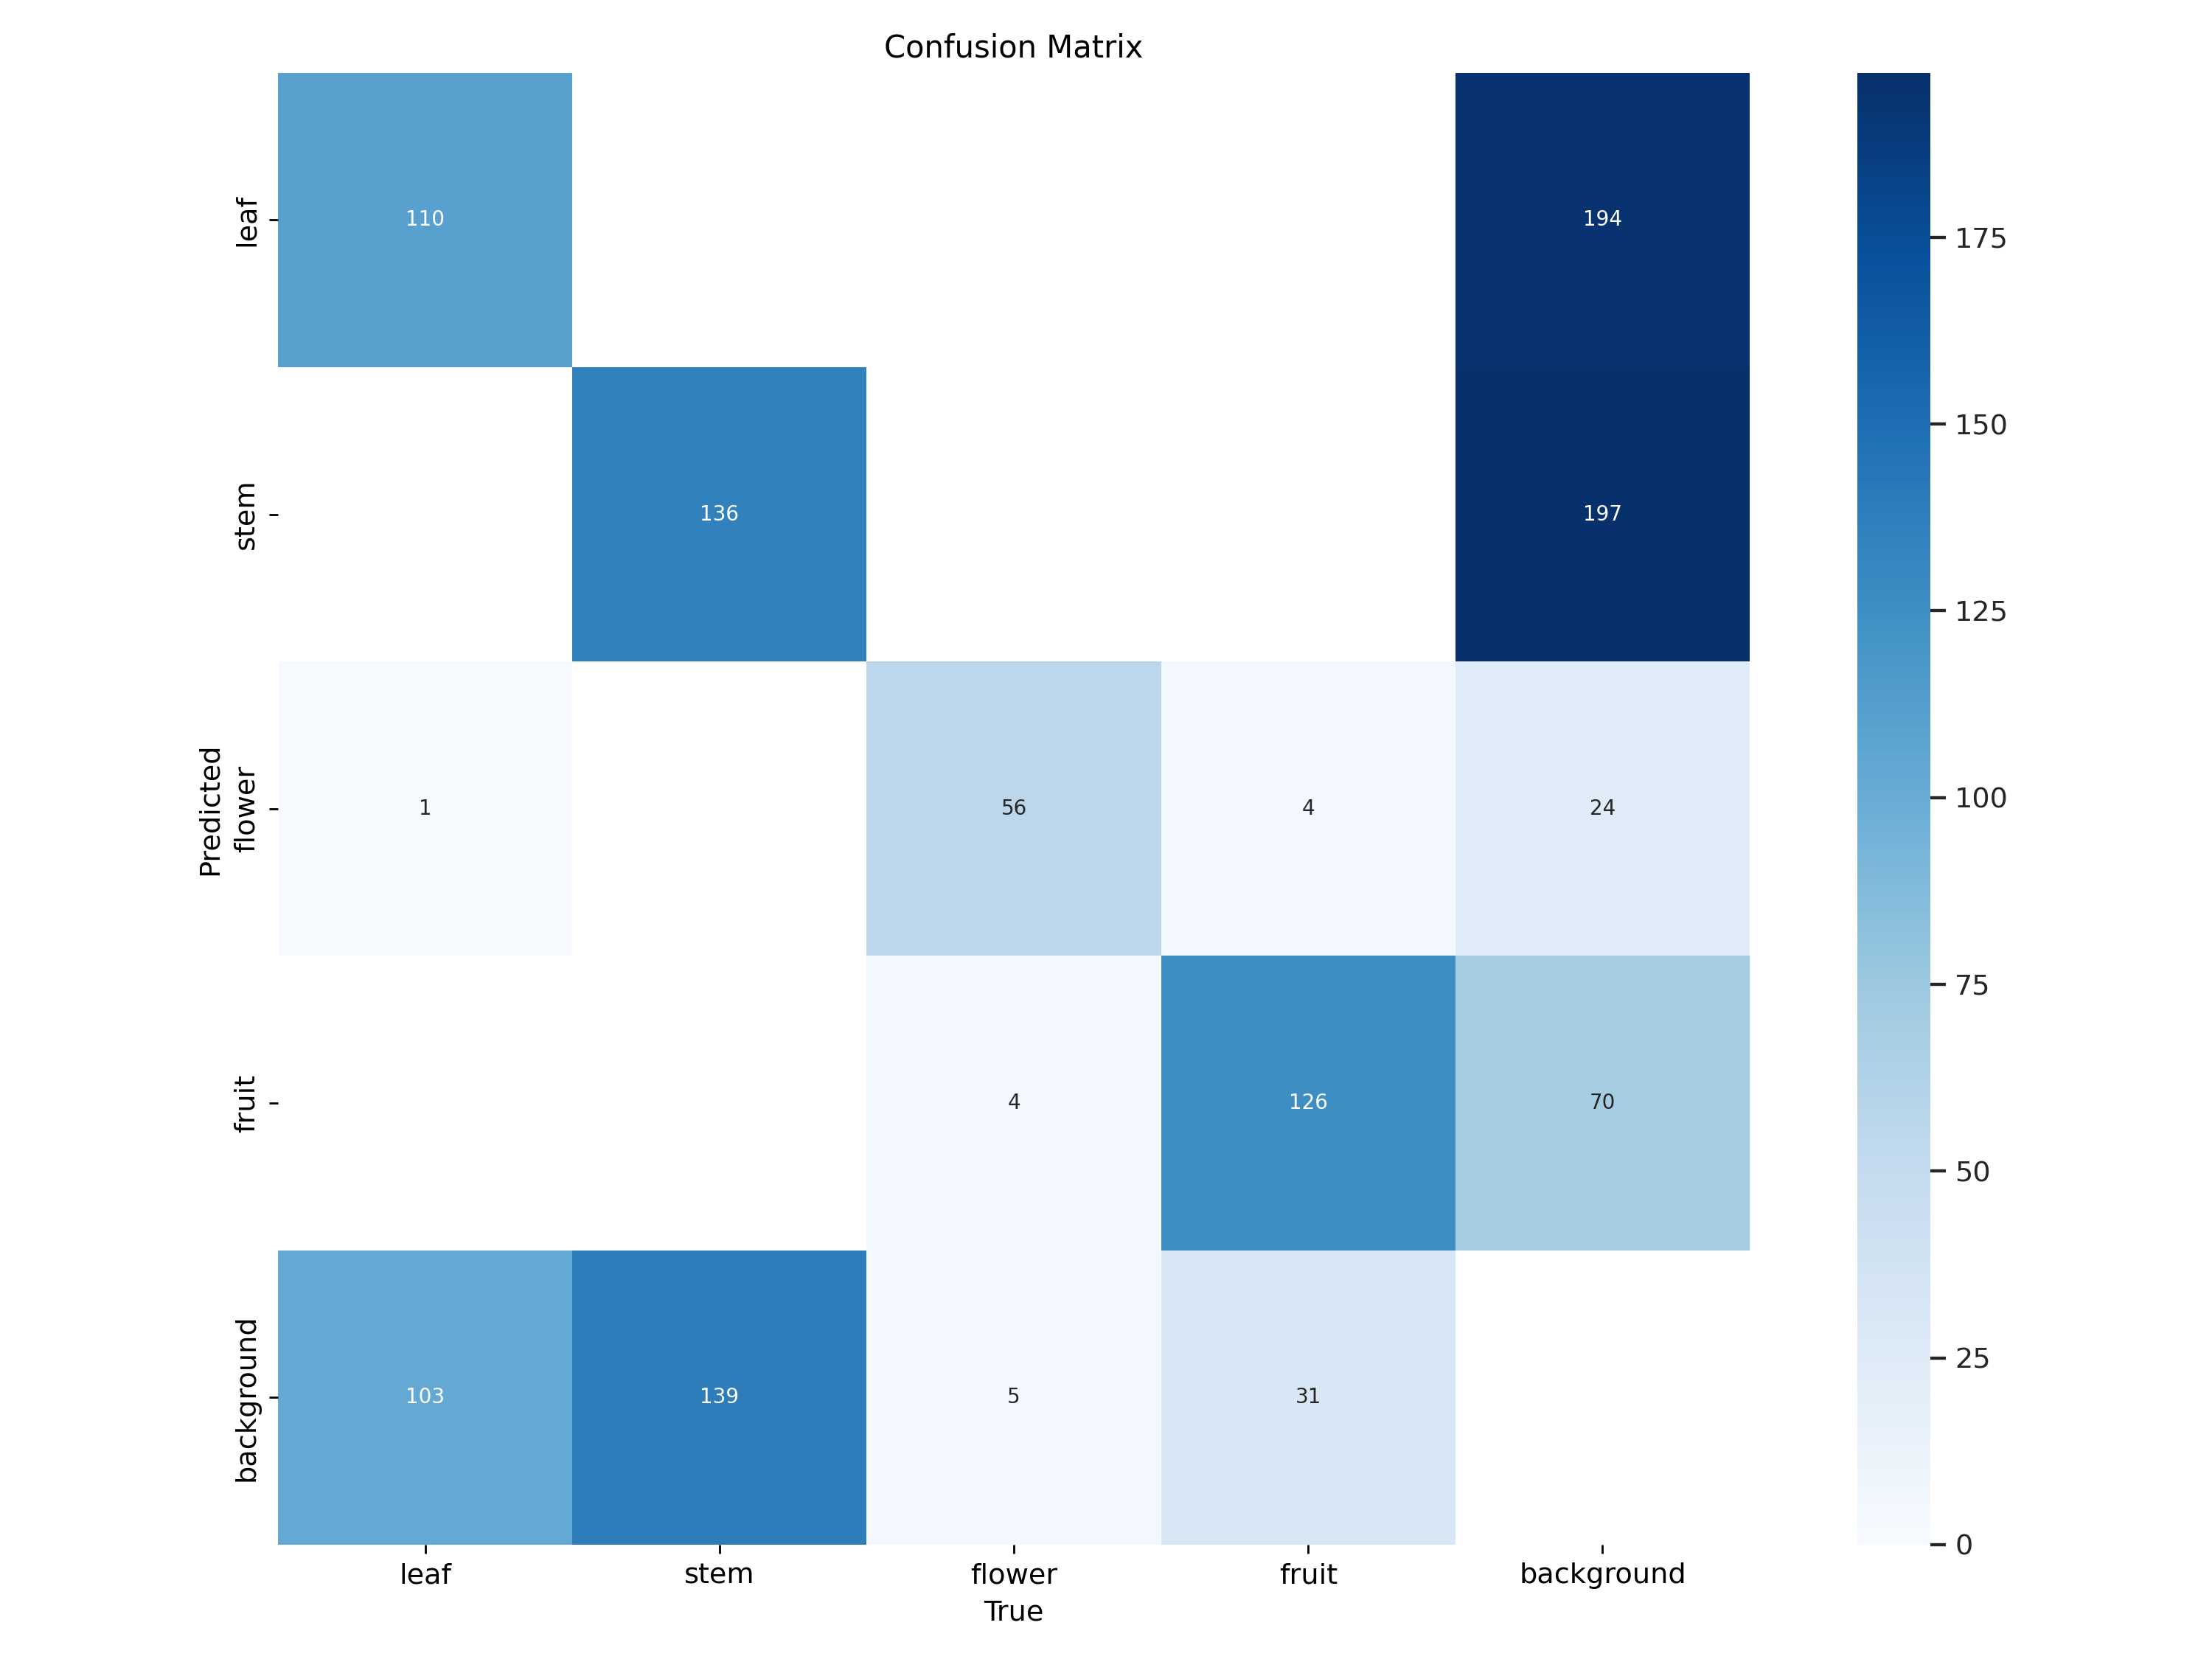

In [ ]:
Image(filename=f'/content/runs/detect/train2/confusion_matrix.png', width=700)

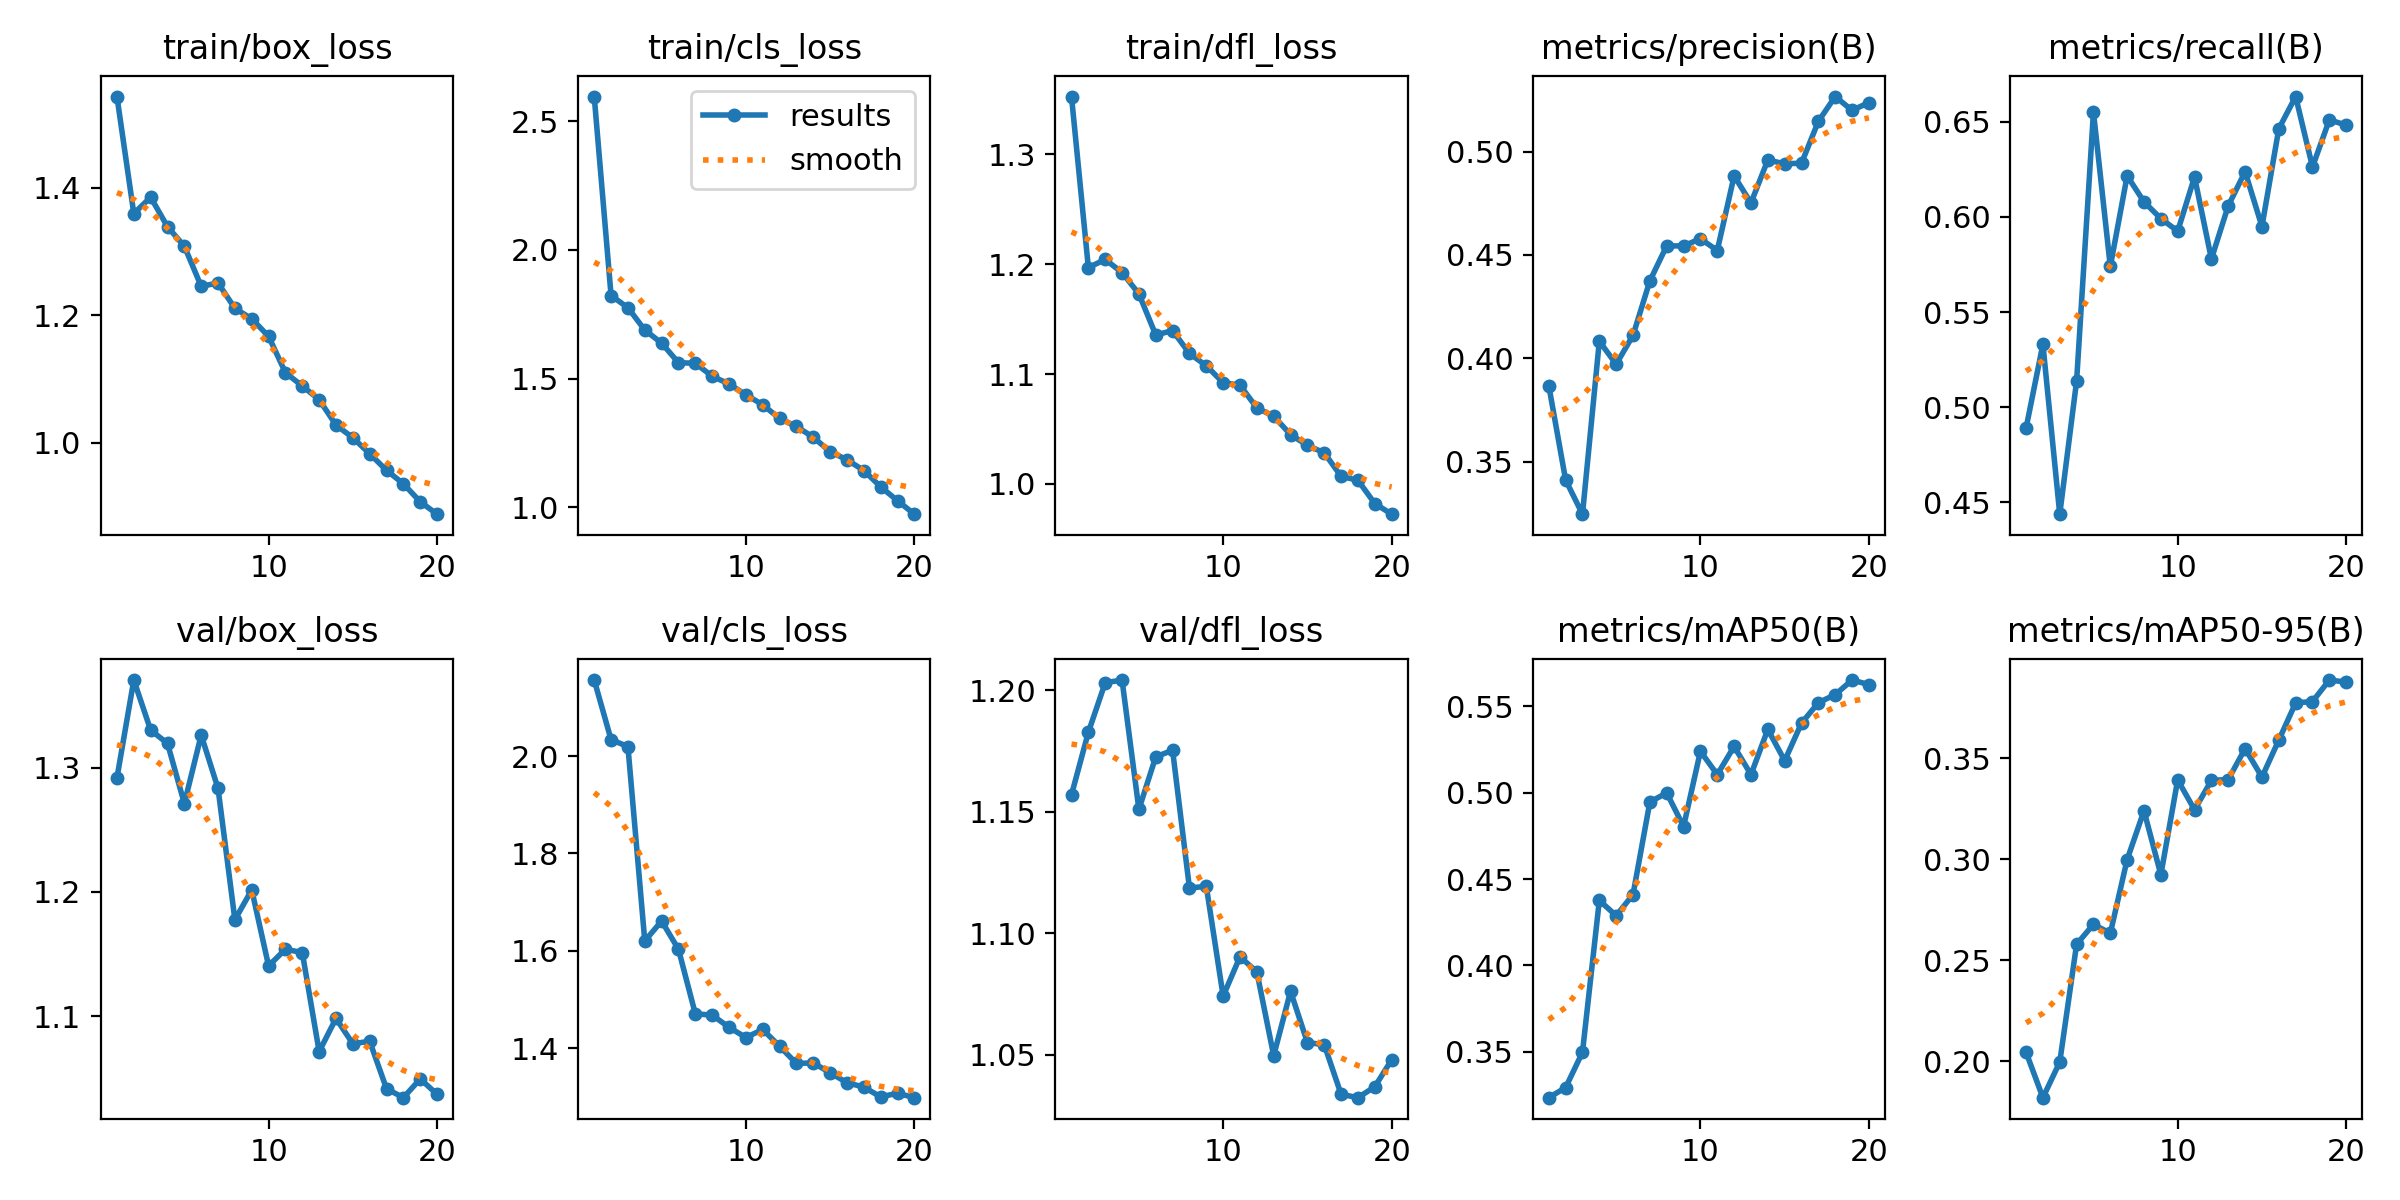

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=1000)

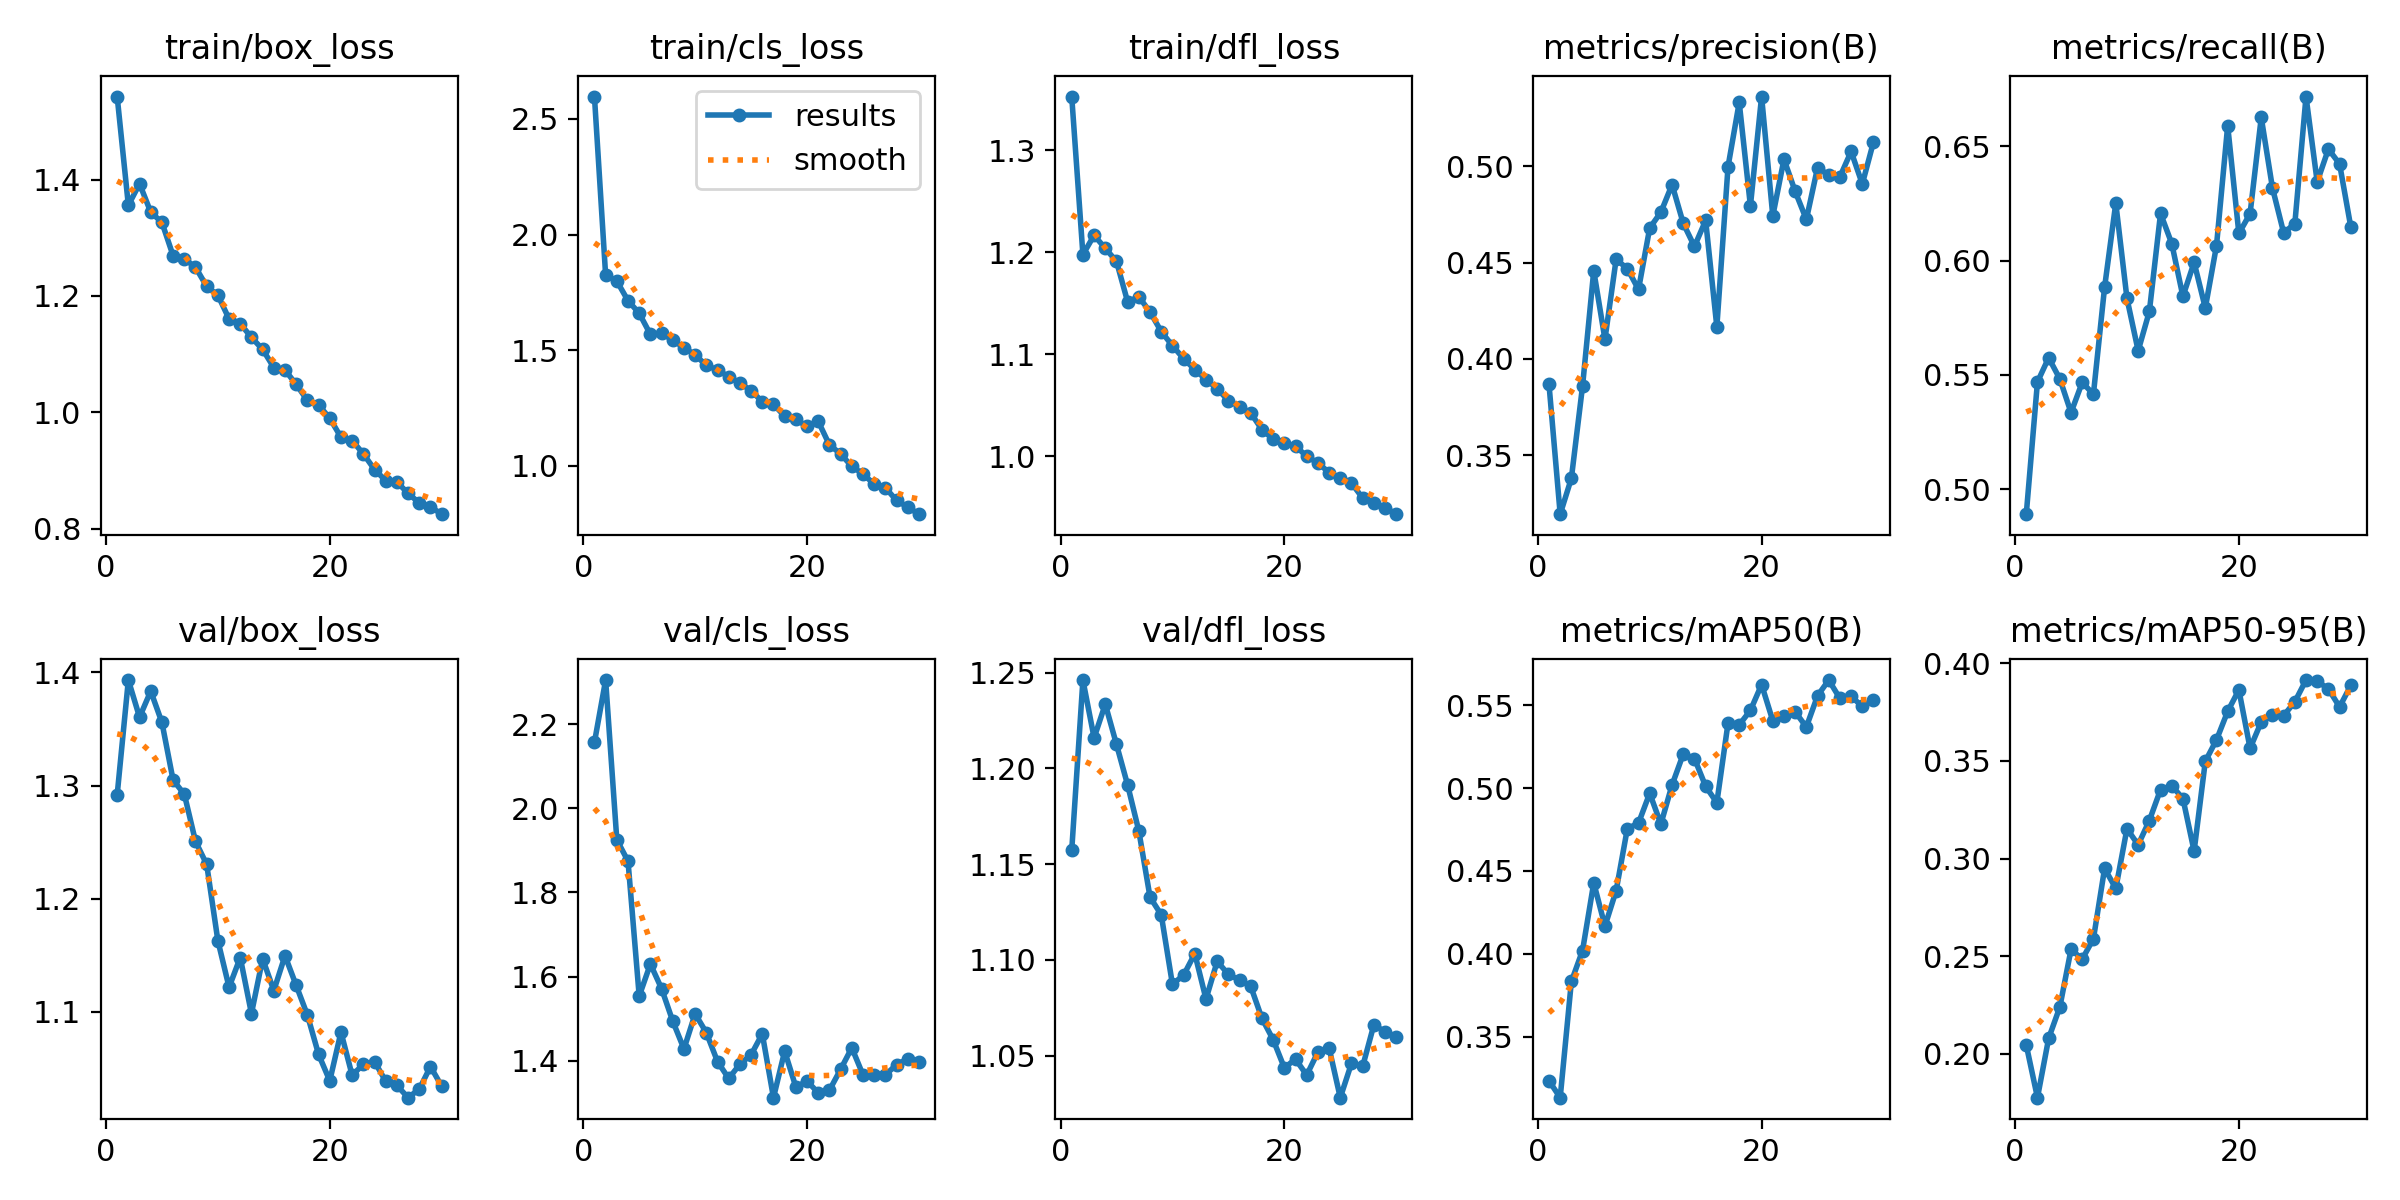

In [ ]:
Image(filename=f'/content/runs/detect/train2/results.png', width=1000)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data={dataset_location}/data.yaml

Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/MyDrive/DLP/sample_data/valid/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100% 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:17<00:00,  2.49s/it]
                   all        100        715      0.503      0.667      0.562       0.39
                  leaf        100        214      0.345      0.519      0.357      0.316
                  stem        100        275      0.389      0.476      0.354      0.208
                flower        100         65      0.659      0.877      0.809      0.556
                 fruit        100        161       0.62      0.795      0.728      0.479
Speed: 7.5ms preprocess, 49.9ms inference, 0.0ms loss, 41.1ms postprocess per image
Results saved to runs/detect/val
💡 Le

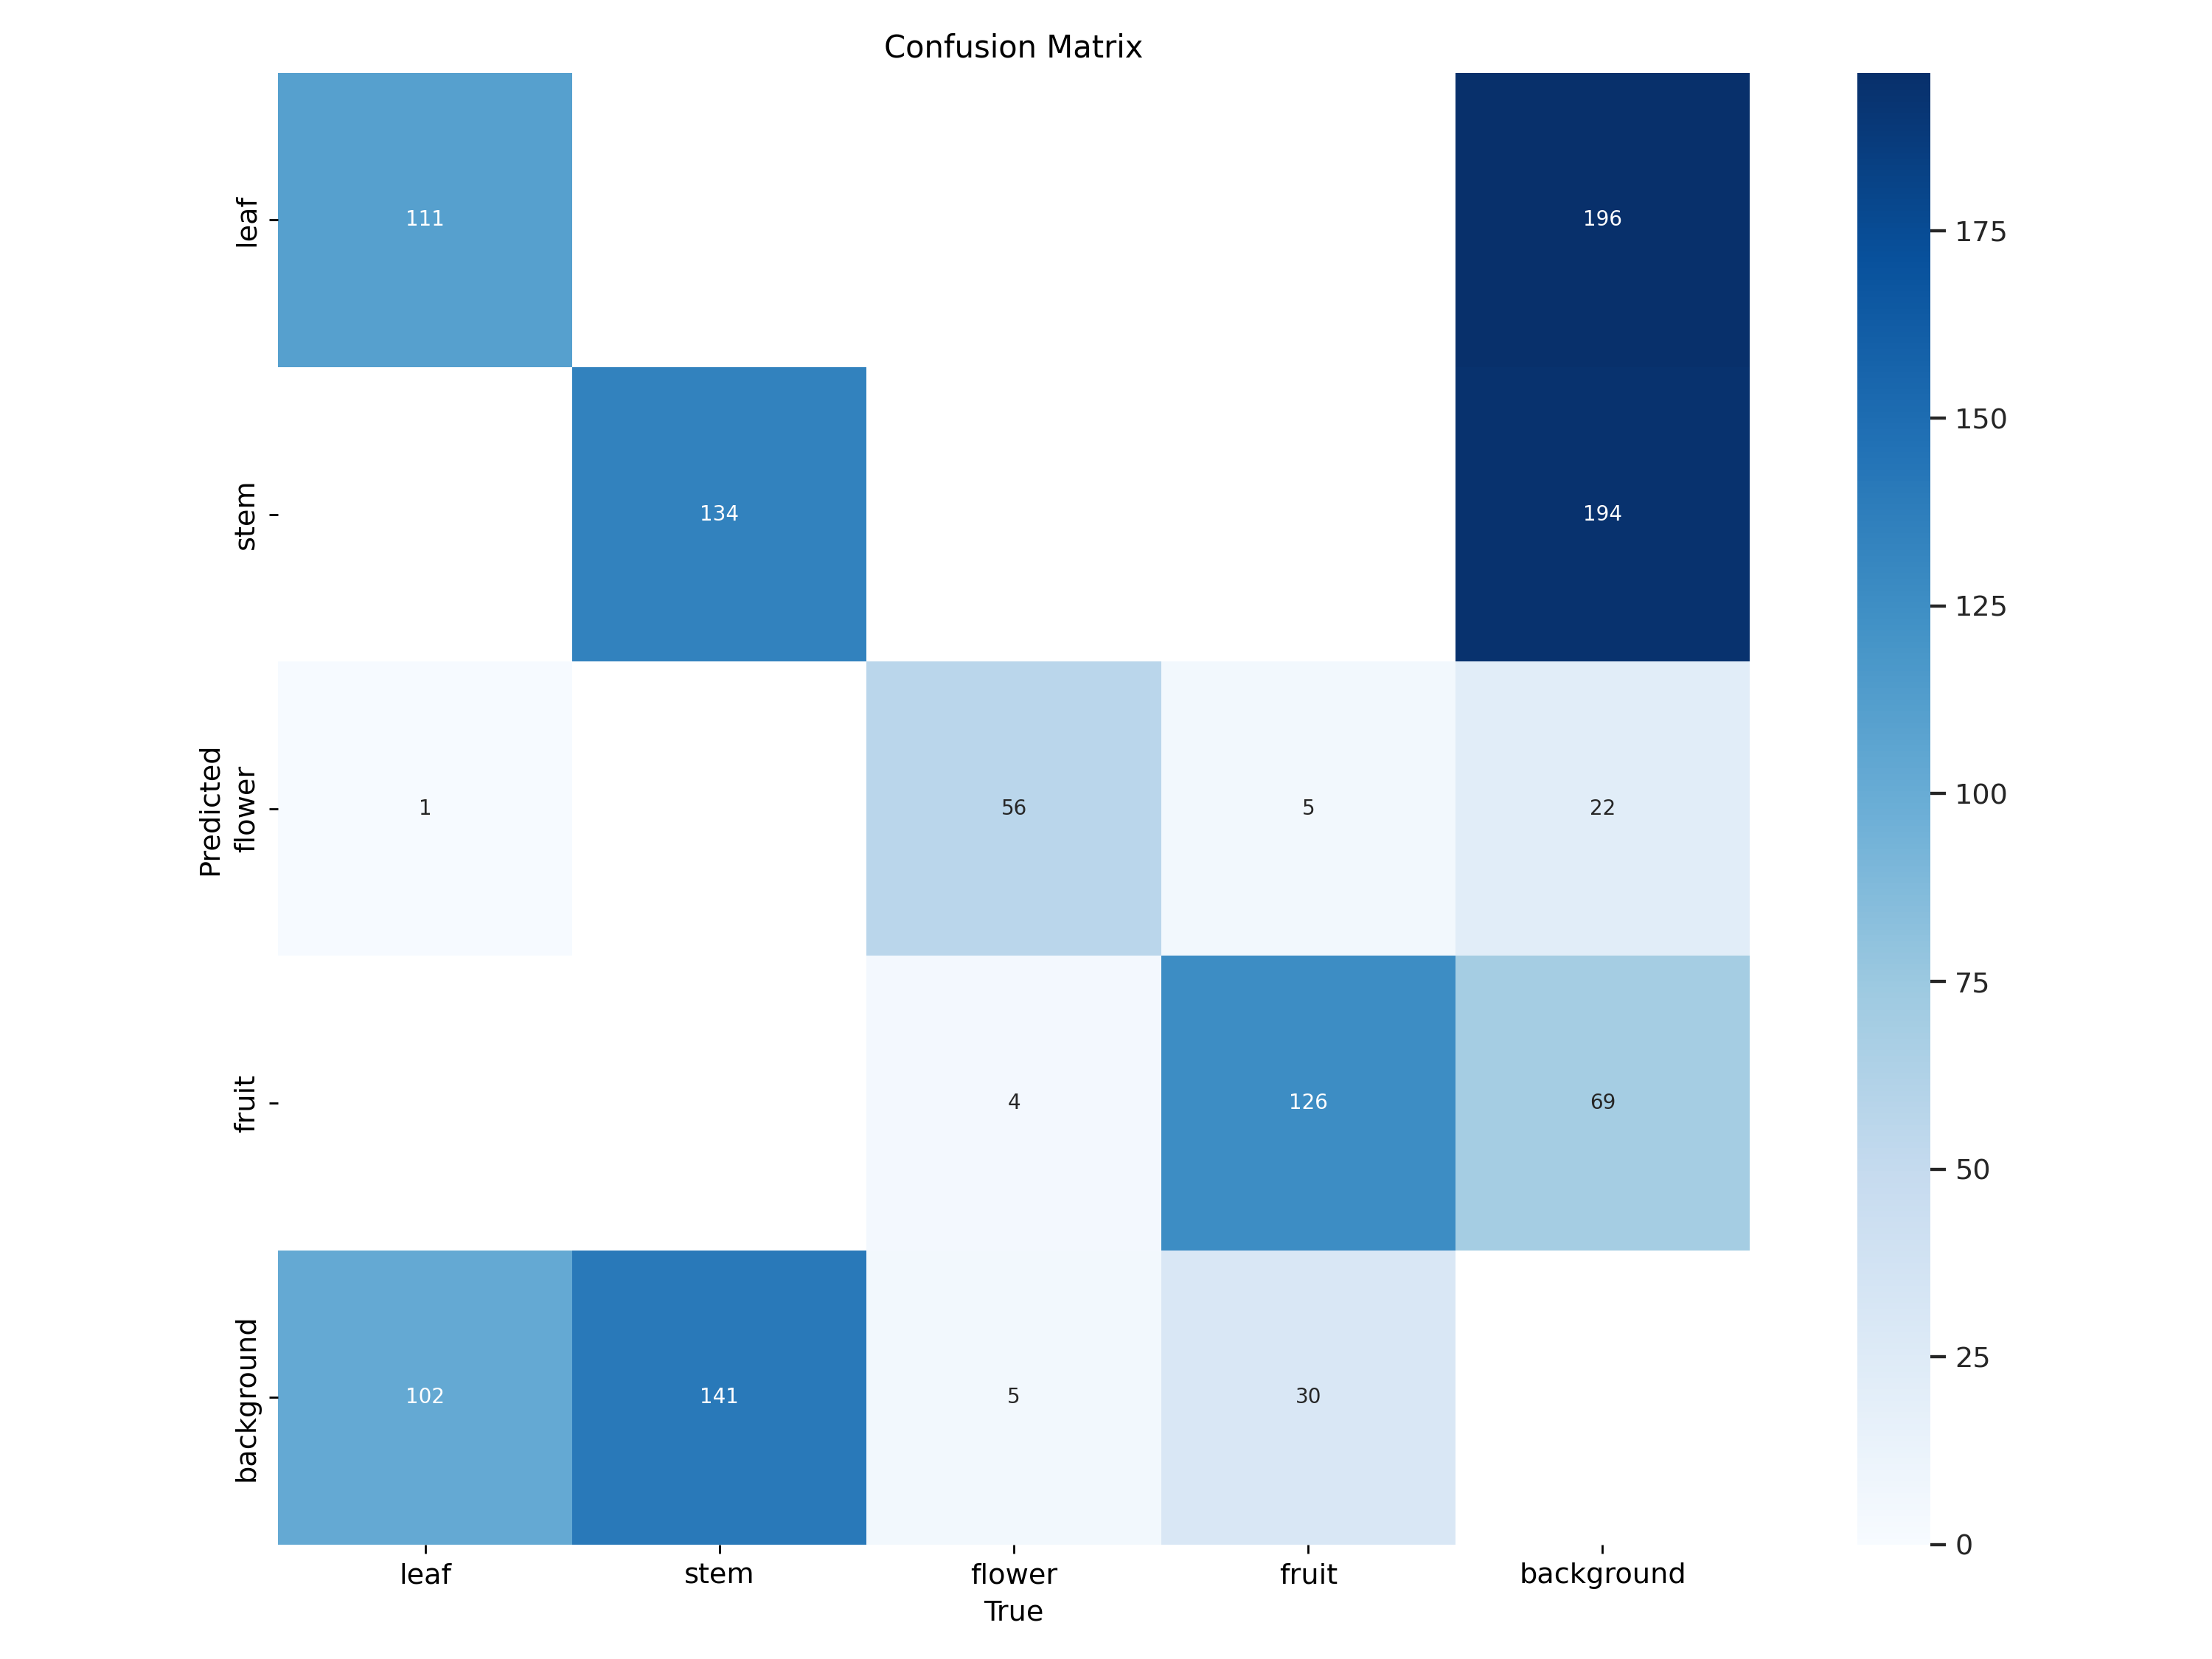

In [ ]:
Image(filename=f'/content/runs/detect/val/confusion_matrix.png', width=700)

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source={dataset_location}/test/images